In [7]:
!conda env list

# conda environments:
#
base                     /Users/mareikemeyer/anaconda3
PIER                  *  /Users/mareikemeyer/anaconda3/envs/PIER



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [11]:
# Import data from csv file
df = pd.read_csv('data_prep/dataset_2019_only.csv')

# Print
df

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air_temperature_(degC)
0,2019-04-01 05:40:01,2019-04-01 05:51:05,60.0,Itämerentori,25.0,Narinkka,2293.0,659.0,0.208771,60.163531,24.914517,60.170042,24.934607,0.4
1,2019-04-01 05:53:14,2019-04-01 05:56:26,85.0,Jalavatie,83.0,Meilahden sairaala,479.0,190.0,0.151263,60.193470,24.905889,60.190219,24.908335,0.4
2,2019-04-01 06:04:00,2019-04-01 06:17:33,86.0,Kuusitie,114.0,Ratapihantie,2598.0,812.0,0.191970,60.195245,24.901900,60.196431,24.936256,0.1
3,2019-04-01 06:08:41,2019-04-01 06:14:24,26.0,Kamppi (M),64.0,Tyynenmerenkatu,1611.0,339.0,0.285133,60.168610,24.930537,60.156838,24.920661,0.1
4,2019-04-01 06:12:01,2019-04-01 06:31:09,35.0,Cygnaeuksenkatu,128.0,Päijänteentie,0.0,1144.0,0.000000,60.174064,24.928228,60.192058,24.964224,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787552,2019-10-31 23:54:42,2019-11-01 00:29:17,21.0,Töölönlahdenkatu,7.0,Designmuseo,2460.0,2072.0,0.071236,60.172191,24.939308,60.163103,24.945960,2.5
3787553,2019-10-31 23:54:46,2019-10-31 23:58:13,82.0,Töölöntulli,78.0,Messeniuksenkatu,489.0,205.0,0.143122,60.190957,24.912827,60.187835,24.918010,2.5
3787554,2019-10-31 23:54:55,2019-10-31 23:58:28,82.0,Töölöntulli,78.0,Messeniuksenkatu,471.0,209.0,0.135215,60.190957,24.912827,60.187835,24.918010,2.5
3787555,2019-10-31 23:58:23,2019-11-01 00:22:32,260.0,Herttoniemi (M),239.0,Viikin tiedepuisto,4516.0,1446.0,0.187386,60.194615,25.028872,60.227521,25.010062,2.5


In [ ]:
#clean
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Print head
df.head()

In [6]:
#filter out only 2019 data for smaller starter dataset
df_2019 = df[df['departure'].str.contains('2019') ]

In [7]:
df_2019.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air_temperature_(degC)
3129089,2019-04-01 05:40:01,2019-04-01 05:51:05,60,Itämerentori,25.0,Narinkka,2293.0,659.0,0.208771,60.163531,24.914517,60.170042,24.934607,0.4
3129090,2019-04-01 05:53:14,2019-04-01 05:56:26,85,Jalavatie,83.0,Meilahden sairaala,479.0,190.0,0.151263,60.193470,24.905889,60.190219,24.908335,0.4
3129091,2019-04-01 06:04:00,2019-04-01 06:17:33,86,Kuusitie,114.0,Ratapihantie,2598.0,812.0,0.191970,60.195245,24.901900,60.196431,24.936256,0.1
3129092,2019-04-01 06:08:41,2019-04-01 06:14:24,26,Kamppi (M),64.0,Tyynenmerenkatu,1611.0,339.0,0.285133,60.168610,24.930537,60.156838,24.920661,0.1
3129093,2019-04-01 06:12:01,2019-04-01 06:31:09,35,Cygnaeuksenkatu,128.0,Päijänteentie,0.0,1144.0,0.000000,60.174064,24.928228,60.192058,24.964224,0.1


In [8]:
#try pairplot
# sns.pairplot(df_2019)

#doesnt work needs more cleanup/filtering?

/Users/birgit/anaconda3/envs/pier_ws/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/birgit/anaconda3/envs/pier_ws/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/birgit/anaconda3/envs/pier_ws/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/birgit/anaconda3/envs/pier_ws/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1134f0f40> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x196d6b880> (for post_execute):



KeyboardInterrupt



<Axes: xlabel='departure_longitude', ylabel='departure_latitude'>

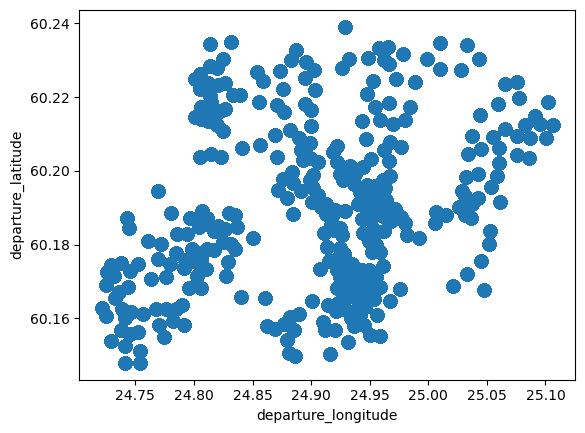

In [15]:
#try plot the coordinates on a map

df_2019.plot(x="departure_longitude", y="departure_latitude", kind="scatter", 
        s=80, alpha=0.2)

In [11]:
#are the coordinates of a station the same?
df_stat = df[df['departure_name'].str.contains('Jalavatie') ]

df_stat.head()


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air_temperature_(degC)
82,2020-03-23 07:59:23,2020-03-23 15:28:14,85,Jalavatie,104.0,Kriikunakuja,1754.0,540.0,0.194889,60.19347,24.905889,60.205678,24.891682,1.1
157,2020-03-23 08:45:20,2020-03-23 08:58:30,85,Jalavatie,206.0,Ruskeasuon varikko,2928.0,786.0,0.223511,60.19347,24.905889,60.207680,24.898668,1.5
187,2020-03-23 09:08:33,2020-03-23 09:13:27,85,Jalavatie,81.0,Stenbäckinkatu,947.0,290.0,0.195931,60.19347,24.905889,60.188309,24.912372,1.9
261,2020-03-23 10:00:15,2020-03-23 10:08:45,85,Jalavatie,39.0,Ooppera,1766.0,506.0,0.209407,60.19347,24.905889,60.182553,24.926687,2.1
574,2020-03-23 13:07:31,2020-03-23 13:07:52,85,Jalavatie,85.0,Jalavatie,0.0,16.0,0.000000,60.19347,24.905889,60.193470,24.905889,4.0


In [14]:
sns.heatmap(df_2019['departure_longitude', 'departure_latitude'], annot=True)

KeyError: ('departure_longitude', 'departure_latitude')